<a href="https://colab.research.google.com/github/iypc-team/CoLab/blob/master/PTBlackjack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import
import os, shutil
from pathlib import Path
from google.colab import drive
drive.flush_and_unmount()
drive.mount('/content/drive', force_remount=True)
os.chdir('/content/drive/My Drive/PythonFiles')
import ImportDriveFiles
import GetTPU
from GetTPU import *
from BashColors import C
from ColabFiles import *

Mounted at /content/drive


In [ ]:
cdf.updateFiles()
cdf.listColabFiles()

In [ ]:
readMePath=cdf.allFilesDict[126]
with open(readMePath, 'r') as file:
    print(f'{C.Green}{basename(readMePath)}{C.White}\n')
    print(file.read())

In [4]:
os.chdir('/content/drive/My Drive/PT/Fundamentals')
dirList=glob('*.py')
pth=None
pathList=[]
projectDict={}
counter=0
for filName in dirList:
    fullPath=abspath(filName)
    if fullPath.__contains__('blackJack'):
        counter+=1
        projectDict[counter]=fullPath
        pathList.append(fullPath)
        print(f'{counter}. {C.Green}{fullPath}{C.White}')
for pth in sorted(pathList):
    bn=basename(pth)
    name=os.path.splitext(bn)
    thisModule=name[0]
    print(f'{thisModule}')
    
import control_blackJack_no_es
import main_control_blackJack_no_es
import main_prediction_blackJack as mmain
import prediction_blackJack
# from prediction_blackJack import Agent
os.chdir('/content')

1. /content/drive/My Drive/PT/Fundamentals/control_blackJack_no_es.py
2. /content/drive/My Drive/PT/Fundamentals/main_control_blackJack_no_es.py
3. /content/drive/My Drive/PT/Fundamentals/main_prediction_blackJack.py
4. /content/drive/My Drive/PT/Fundamentals/prediction_blackJack.py
control_blackJack_no_es
main_control_blackJack_no_es
main_prediction_blackJack
prediction_blackJack


In [5]:
def copyToContent(path_list):
    os.chdir('/content')
    print(f'{C.Green}Copied to /content directory:{C.White}')
    for pth in path_list:
        sourcePath=pth
        destinationPath= os.path.join('/content', basename(pth))
        shutil.copy(sourcePath, destinationPath)
        print(basename(destinationPath))
copyToContent(path_list=pathList)

Copied to /content directory:
control_blackJack_no_es.py
main_control_blackJack_no_es.py
main_prediction_blackJack.py
prediction_blackJack.py


In [6]:
addLine='from __future__ import absolute_import'
for pth in pathList:
    with open(pth,'r') as fil:
        print(f'{C.Green}{basename(pth)}\n')
        print(f'{C.White}{fil.read()}')

control_blackJack_no_es.py

import numpy as np

class Agent():
    def __init__(self, eps=0.1, gamma=0.99):
        self.Q = {}
        self.sum_space = [i for i in range(4, 22)]
        self.dealer_show_card_space = [i+1 for i in range(10)]
        self.ace_space = [False, True]
        self.action_space = [0, 1] #stick or hit

        self.state_space = []
        self.memory = []
        self.pairs_visited = {}
        self.returns = {}

        self.gamma = gamma
        self.eps = eps

        self.init_vals()
        self.init_policy()

    def init_vals(self):
        for total in self.sum_space:
            for card in self.dealer_show_card_space:
                for ace in self.ace_space:
                    state = (total, card, ace)
                    self.state_space.append(state)
                    for action in self.action_space:
                        self.Q[(state, action)] = 0
                        self.returns[(state, action)] = []
                        self.pa

episode: 0 win rate 0.0 percent
37.0 percent
37.2 percent
37.6 percent
38.6 percent
38.7 percent
39.2 percent
39.2 percent
39.5 percent
39.7 percent
40.0 percent
40.2 percent
40.2 percent
40.3 percent
40.4 percent
40.4 percent
40.4 percent
40.5 percent
40.6 percent
40.6 percent
40.7 percent
40.7 percent
40.7 percent
40.8 percent
40.7 percent
40.8 percent
40.8 percent
40.9 percent
40.8 percent
40.8 percent
40.8 percent
40.9 percent
41.0 percent
40.9 percent
40.9 percent
40.9 percent
41.0 percent
41.0 percent
41.0 percent
41.0 percent
41.0 percent
41.0 percent
41.1 percent
41.1 percent
41.1 percent
41.1 percent
41.1 percent
41.1 percent
41.1 percent
41.1 percent
41.0 percent
episode: 50000 win rate 41.0 percent
41.1 percent
41.1 percent
41.1 percent
41.0 percent
41.0 percent
41.1 percent
41.1 percent
41.1 percent
41.1 percent
41.1 percent
41.1 percent
41.1 percent
41.0 percent
41.0 percent
41.1 percent
41.0 percent
41.0 percent
41.1 percent
41.1 percent
41.0 percent
41.1 percent
41.1 per

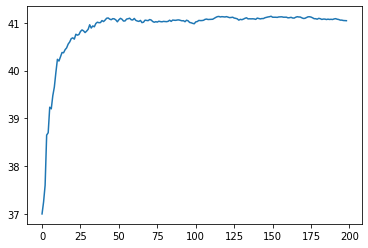

In [7]:
import gym
import matplotlib.pyplot as plt
from control_blackJack_no_es import Agent
import FunctionTimer
from FunctionTimer import ft
startTime=ft.getTimeStamp()
if __name__=='__main__':
    env=gym.make('Blackjack-v0')
    agent=Agent(eps=0.001) # default eps=0.001
    n_episodes=200000
    win_loose_draw={-1:0, 0:0, 1:0}
    win_rates=[]
    for i in range(n_episodes):
        if i > 0 and i % 1000==0:
            pct=win_loose_draw[1] / i
            pct=pct*100
            print(f'{C.Green}{round(pct,1)} percent{C.ColorOff}')
            win_rates.append(pct)
        if i % 50000 == 0:
            rates=win_rates[-1] if win_rates else 0.0
            print(f'episode: {i} win rate {round(rates,1)} percent')
        observation=env.reset()
        done=False
        while not done:
            action=agent.choose_action(state=observation)
            observation_, reward, done, info = env.step(action=action)
            agent.memory.append((observation, action, reward))
            observation=observation_
        agent.update_Q()
        win_loose_draw[reward]+=1
    plt.plot(win_rates)
    plt.show

endTime=ft.getTimeStamp()
print(f'{C.BIPurple}')
ft.tpuTiming(start=startTime, end=endTime)
print(f'{C.ColorOff}')